<a href="https://colab.research.google.com/github/2019mohamed/AdvanceData-Analysis-Nanodegree-Program/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Questions**

-What is influence diseases between [’Hipertension’, ’Diabetes’, ’Alcoholism’]?

-What is probabilities one has of Scholarship, Hipertension, Diabetes, Alcoholism, SMS-received and No-show?

-What are start Appointment Day, last Appointment Day, start Scheduled Day
and last Scheduled Day, and what is probability of equities between Appointment Day and Scheduled Day?

-Frequencies of ages and its description. So, what is the most age frequency?

-What about correlations between features?

-what is the most sex frequency?

-What is joint distribution between gender and diabetes? OR What is the
most sex had diabetes?

-What is relationship between Scholarship and diabetes?

-What is the most(and least) neighborhood has diabetes?

-What are important features?


Read dataset Medical-Appointments-No-Shows

In [ ]:
import pandas as pd
% matplotlib inline

data = pd.read_csv('KaggleV2-May-2016.csv' , parse_dates=['ScheduledDay' , 'AppointmentDay' ])
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Clean data:-
missing data, binarize some cols and so on...

In [ ]:
data['PatientId'] = data['PatientId'].astype(int)
data['ScheduledDay'] = data['ScheduledDay'].apply(lambda x: x.strftime("%Y-%m-%d"))
data['AppointmentDay'] = data['AppointmentDay'].apply(lambda x: x.strftime("%Y-%m-%d"))
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'] )
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['No-show'] = data['No-show'].apply(lambda x : 1 if x == 'No' else 0)#1 = No, 0 =Yes
data['Gender'] = data['Gender'].apply(lambda x : 0 if x == 'F' else 1)#0 = F, 1 = M
data.head(15)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,95985133231274,5626772,0,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,1
6,733688164476661,5630279,0,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3449833394123,5630575,0,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0
8,56394729949972,5638447,0,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,1
9,78124564369297,5629123,0,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,1


In [ ]:
data.drop_duplicates(subset='PatientId', keep="last" , inplace = True)
print(data.duplicated().sum(),' ',data['PatientId'].duplicated().sum(),' ',data['AppointmentID'].duplicated().sum())
print('table ',data.shape)

0   0   0
table  (62299, 14)


In [ ]:
print('Age:',sorted(data['Age'].unique()))#has outliers
print('Gender:',data['Gender'].unique())
print('Handcap:',data['Handcap'].unique())
print('Hipertension:',data['Hipertension'].unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: [0 1]
Handcap: [0 1 2 3 4]
Hipertension: [1 0]


In [ ]:
data = data[(data['Age'] > 0) & (data['Age'] < 100)]
print('Age:',sorted(data['Age'].unique()))

Age: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [ ]:
data.info()
data.nunique()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60257 entries, 4 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PatientId       60257 non-null  int64         
 1   AppointmentID   60257 non-null  int64         
 2   Gender          60257 non-null  int64         
 3   ScheduledDay    60257 non-null  datetime64[ns]
 4   AppointmentDay  60257 non-null  datetime64[ns]
 5   Age             60257 non-null  int64         
 6   Neighbourhood   60257 non-null  object        
 7   Scholarship     60257 non-null  int64         
 8   Hipertension    60257 non-null  int64         
 9   Diabetes        60257 non-null  int64         
 10  Alcoholism      60257 non-null  int64         
 11  Handcap         60257 non-null  int64         
 12  SMS_received    60257 non-null  int64         
 13  No-show         60257 non-null  int64         
dtypes: datetime64[ns](2), int64(11), object(1)
memory usa

PatientId         60257
AppointmentID     60257
Gender                2
ScheduledDay        102
AppointmentDay       27
Age                  99
Neighbourhood        81
Scholarship           2
Hipertension          2
Diabetes              2
Alcoholism            2
Handcap               5
SMS_received          2
No-show               2
dtype: int64

Here, represention data such as bipartite graph B, its nodes idspatient and L=['Scholarship' , 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received','No-show']. its edges are link between ids and L list if id has element in L.

This graph can get infulance nodes and analysis data.


`what is influence diseases between ['Hipertension', 'Diabetes', 'Alcoholism']?`

In [ ]:
from networkx.algorithms import bipartite
import networkx as nx
import matplotlib.pyplot as plt

B = nx.Graph()
B.add_nodes_from(['Scholarship' , 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received','No-show'], bipartite=0)
B.add_nodes_from(data['PatientId'].to_numpy(), bipartite=1)
edges= []
for i1 , i2 , i3 ,i4 , i5, i6, i7 in zip(data['PatientId'].to_numpy() , data['Scholarship'].to_numpy() , data['Hipertension'].to_numpy() , data['Diabetes'].to_numpy()
                                         , data['Alcoholism'].to_numpy() , data['SMS_received'].to_numpy() ,data['No-show'].to_numpy() ):
  if i2 == 1:
    edges.append(('Scholarship' , i1))
  if i3 == 1:
    edges.append(('Hipertension' , i1))
  if i4 == 1:
    edges.append(('Diabetes' , i1))
  if i5 == 1:
    edges.append(('Alcoholism' , i1))  
  if i6 == 1:
    edges.append(('SMS_received' , i1))
  if i7 == 1:
    edges.append(('No-show' , i1))
 
B.add_edges_from(edges)
'''
X, Y = ['Scholarship' , 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'No-show'] , data['PatientId'].to_numpy()
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw_networkx(B, pos=pos)
plt.show()
'''
print(len(edges),' ',len(list(B.edges)))
print(data['Scholarship'].sum(),' ',B.degree('Scholarship'))
from networkx.algorithms.link_analysis.pagerank_alg import pagerank
D = pagerank(B)
print(D)


93296   93296
5757   5757
{'Scholarship': 0.026645834548290327, 'Hipertension': 0.05447294958600203, 'Diabetes': 0.01848971597527655, 'Alcoholism': 0.006619559320616902, 'SMS_received': 0.1023719670936282, 'No-show': 0.2586763443041205, 8841186448183: 1.375656552090212e-05, 733688164476661: 2.651514147153723e-06, 56394729949972: 6.934535845905347e-06, 78124564369297: 6.934535845905347e-06, 734536231958495: 6.934535845905347e-06, 7542951368435: 6.540321008698679e-06, 566654781423437: 1.0608938716516586e-05, 99884723334928: 6.934535845905347e-06, 99948393975: 1.0823342707450303e-05, 84574392942817: 6.934535845905347e-06, 14794966191172: 6.325917017764964e-06, 17135378245248: 1.4497745578061545e-05, 7223289184215: 6.934535845905347e-06, 863229818887631: 6.540321008698679e-06, 8734857996885: 6.934535845905347e-06, 5819369978796: 1.4346151083918616e-05, 25787851512: 1.045734422237366e-05, 5926171692527: 6.934535845905347e-06, 1225776163665: 6.934535845905347e-06, 342815551642: 6.93453584590

Hipertension is influancer and its degree 12241. it is greater than Diabetes and Alcoholism.

In [ ]:
print(len(data[data['Hipertension'] == 1]),' ', len(data[data['Diabetes'] == 1]) ,' ',len(data[data['Alcoholism'] == 1]))

12241   4416   1506



Some of useful measures in dataset with its probability !



In [ ]:
Number_Scholarship = B.degree('Scholarship')
Number_Hipertension = B.degree('Hipertension')
Number_Diabetes = B.degree('Diabetes')
Number_Alcoholism = B.degree('Alcoholism')
Number_SMS_received = B.degree('SMS_received')
Number_No_show = B.degree('No-show')
N = data.shape[0]
print('Number_Scholarship ',Number_Scholarship,' its P = ',Number_Scholarship/N)
print('Number_Hipertension ',Number_Hipertension,' its P = ',Number_Hipertension/N)
print('Number_Diabetes ',Number_Diabetes,' its P = ',Number_Diabetes/N)
print('Number_Alcoholism ',Number_Alcoholism,' its P = ',Number_Alcoholism/N)
print('Number_SMS_received ',Number_SMS_received,' its P = ',Number_SMS_received/N)
print('Number_No_show ',Number_No_show,' its P = ',Number_No_show/N)

Number_Scholarship  5757  its P =  0.09554076704781188
Number_Hipertension  12241  its P =  0.20314652239573824
Number_Diabetes  4416  its P =  0.07328609124251124
Number_Alcoholism  1506  its P =  0.024992946877541198
Number_SMS_received  20975  its P =  0.3480923378196724
Number_No_show  48401  its P =  0.8032427767728231


What are start Appointment Day, last Appointment Day,
start Scheduled Day and last Scheduled Day, and what is probability of equities between Appointment Day and Scheduled Day?

In [ ]:
start_AppointmentDay, last_AppointmentDay = data['AppointmentDay'].min(),data['AppointmentDay'].max()
start_ScheduledDay , last_ScheduledDay = data['ScheduledDay'].min(),data['ScheduledDay'].max()
print('start_AppointmentDay, last_AppointmentDay ',start_AppointmentDay, ' ',last_AppointmentDay,' Period ', last_AppointmentDay-start_AppointmentDay)
print('start_ScheduledDay , last_ScheduledDay ',start_ScheduledDay , ' ',last_ScheduledDay,' Period ',last_ScheduledDay - start_ScheduledDay)
Equals = len(data[data['AppointmentDay'] == data['ScheduledDay']])
print('equlties between AppointmentDay and ScheduledDay',Equals,' its P ',Equals/N)

start_AppointmentDay, last_AppointmentDay  2016-04-29 00:00:00   2016-06-08 00:00:00  Period  40 days 00:00:00
start_ScheduledDay , last_ScheduledDay  2015-12-07 00:00:00   2016-06-08 00:00:00  Period  184 days 00:00:00
equlties between AppointmentDay and ScheduledDay 20560  its P  0.34120517118343097


Frequencies of ages and its description. So, what is the most age frequency?

(1475, 608.6565656565657, 1)

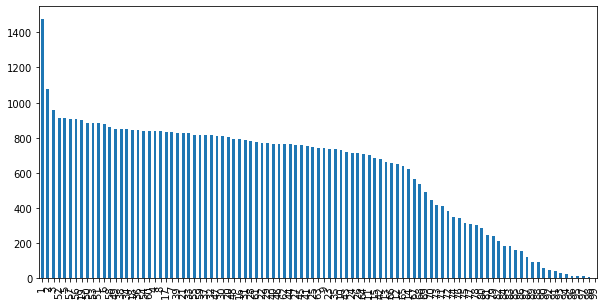

In [ ]:
ages_freq = data['Age'].value_counts()
ages_freq.plot(kind = 'bar', figsize = (10,5))
max, avg ,min = ages_freq.max(), ages_freq.mean(), ages_freq.min()
max, avg , min

In [ ]:
data['Age'].describe()

count    60257.000000
mean        37.948454
std         22.911208
min          1.000000
25%         19.000000
50%         38.000000
75%         56.000000
max         99.000000
Name: Age, dtype: float64

So, 1 year is freq. and min. mean is 38.

Some validation!
Here, we test that one has 1 year ago and has Alcoholism ? surely it is impossible, if dataset has that case, so dataset has impossible case or outlies.

In [ ]:
age1 = data[data['Age'] == 1]
find_Alcoholism = age1[age1['Alcoholism'] == 1] 
find_Handcap = age1[age1['Handcap'] == 0]
find_Handcap.shape , find_Alcoholism.shape

((1474, 14), (0, 14))

Below, corr matrix. So, corr. between features is low.

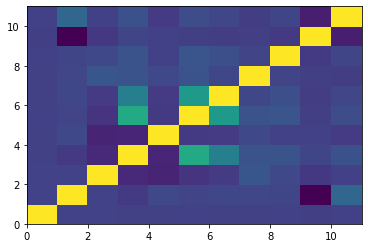

In [ ]:
import matplotlib.pyplot as plt
heat = data.corr()
plt.pcolor(heat)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68d4166ad0>,
      dtype=object)

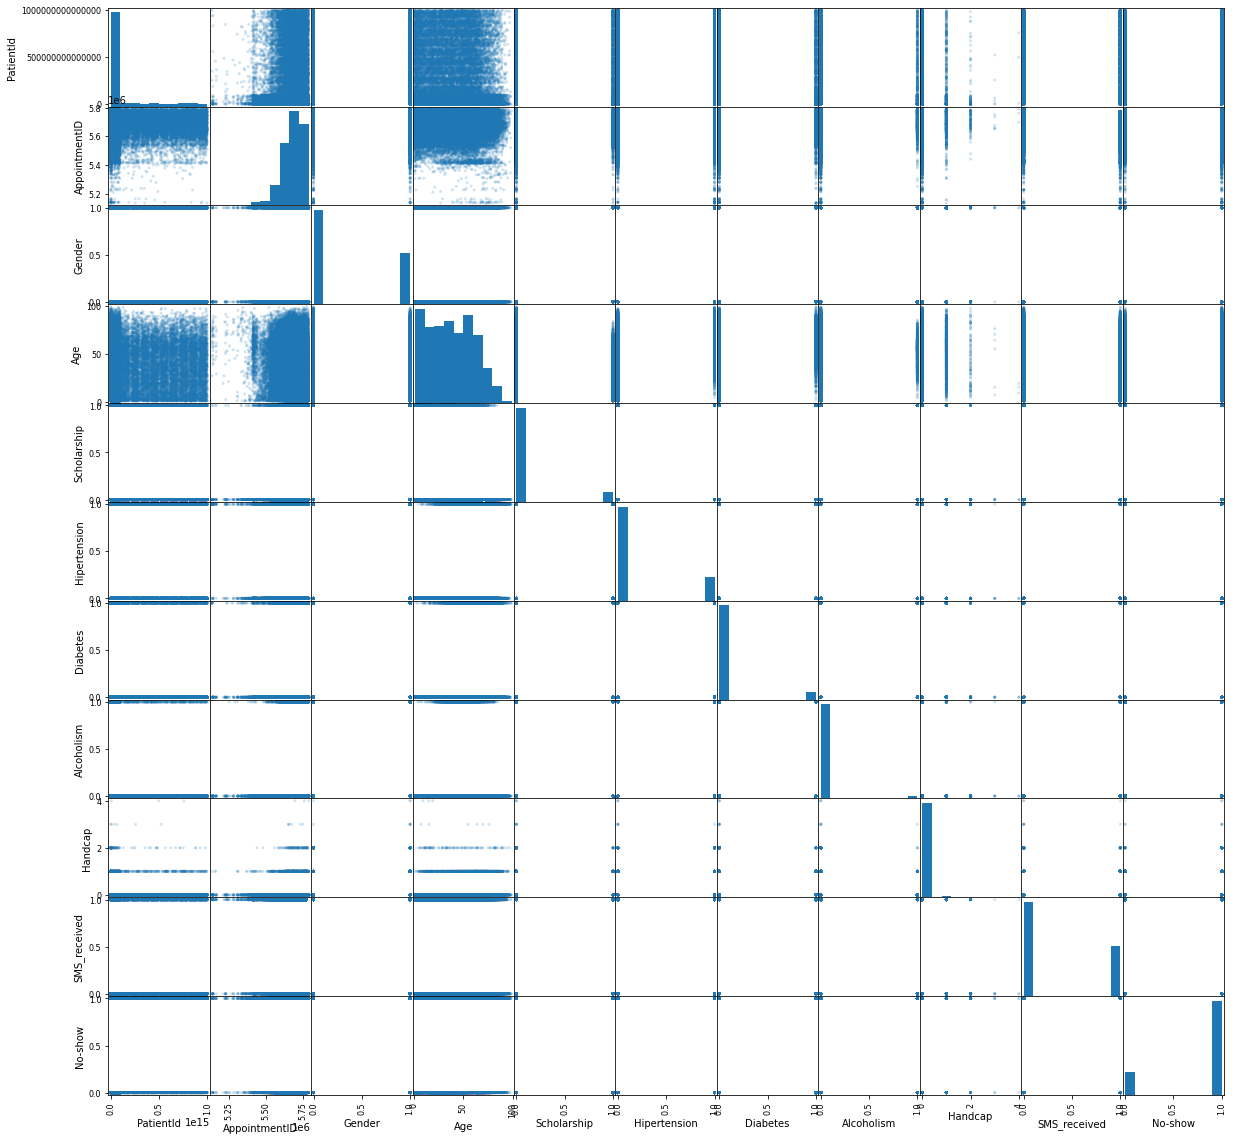

In [ ]:
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(20,20))

what is the most sex frequency?

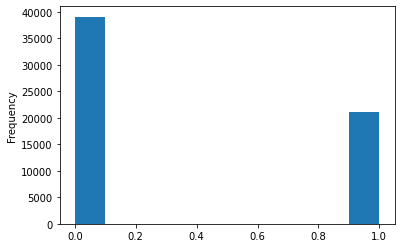

In [ ]:
data['Gender'].plot(kind = 'hist')

In [ ]:
data['Gender'].value_counts()

0    39073
1    21184
Name: Gender, dtype: int64

So, number of females > number of males. => data is imbalanced.

What is joint distribution between gender and diabetes? OR What is the most sex had diabetes?

Gender  Diabetes
0       0           36021
        1            3052
1       0           19820
        1            1364
Name: Diabetes, dtype: int64
P_Fand0  0.5977894684435003   P_Fand1  0.050649717045322534
P_Mand0  0.32892444031398843   P_Mand1  0.022636374197188707
1.0


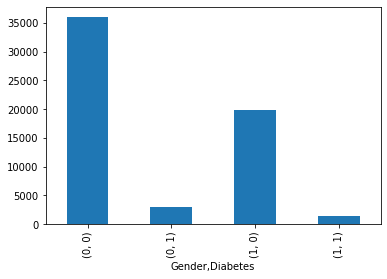

In [ ]:
Gender_Diabetes = data.groupby('Gender').Diabetes.value_counts()

print(Gender_Diabetes)

P_Fand0 = Gender_Diabetes[0][0] / N
P_Fand1 = Gender_Diabetes[0][1] / N
P_Mand0 = Gender_Diabetes[1][0] / N
P_Mand1 = Gender_Diabetes[1][1] / N

print('P_Fand0 ',P_Fand0,' ','P_Fand1 ',P_Fand1)
print('P_Mand0 ',P_Mand0,' ','P_Mand1 ',P_Mand1)
print(P_Fand0 + P_Fand1 + P_Mand0 + P_Mand1)
Gender_Diabetes.plot(kind = 'bar')

So, Females(with P = 0.05) have diabetes more then males(with P = 0.02).

What is relationship between Scholarship and diabetes?

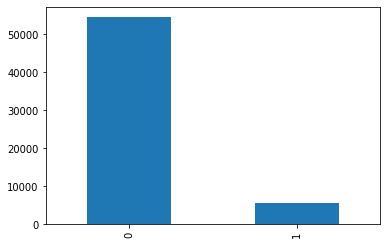

In [ ]:
data['Scholarship'].value_counts().plot(kind = 'bar')

Diabetes_not_Scholarship , Diabetes_Scholarship   0.06819124748991819   0.00509484375259306


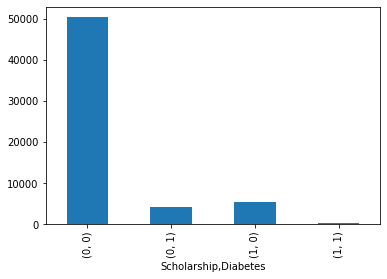

In [ ]:
Scholarship_Diabetes = data.groupby('Scholarship').Diabetes.value_counts()
Scholarship_Diabetes.plot(kind = 'bar')#Many of pepole has Diabetes and hasnot Scholarship
Diabetes_not_Scholarship = Scholarship_Diabetes[0][1]/N
Diabetes_Scholarship = Scholarship_Diabetes[1][1]/N

print('Diabetes_not_Scholarship , Diabetes_Scholarship',' ',Diabetes_not_Scholarship,' ',Diabetes_Scholarship)

So, The number of ones have diabetes and hasn’t scholarship(with P = 0.06) greater than ones have diabetes and scholarship(with P =0.005). Also, most of ones havenot diabete.

What is the most(and least) neighborhood has diabetes?

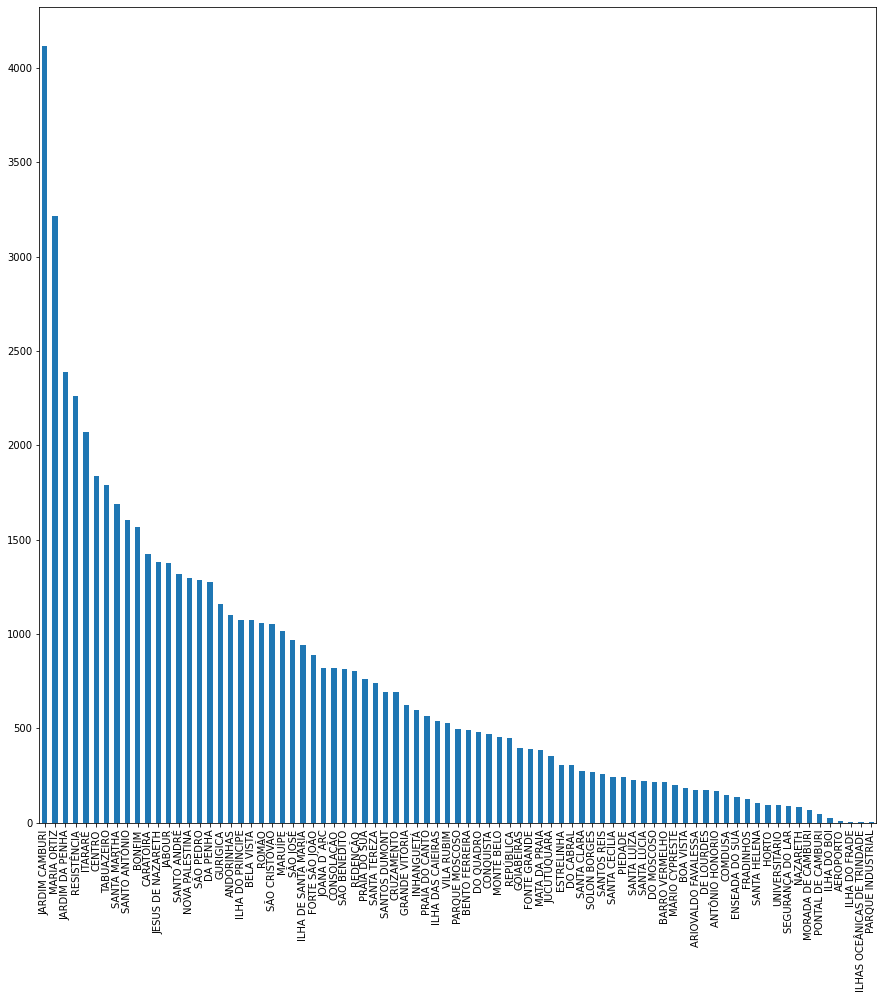

In [ ]:
data['Neighbourhood'].value_counts().plot(kind = 'bar', figsize = (15,15))

Neighbourhood
SEGURANÇA DO LAR      1
SOLON BORGES          1
ANTÔNIO HONÓRIO       2
FRADINHOS             3
ILHA DO BOI           3
                   ... 
NOVA PALESTINA      145
RESISTÊNCIA         148
ITARARÉ             159
SANTA MARTHA        159
JARDIM DA PENHA     214
Name: Diabetes, Length: 75, dtype: int64


"\nmax_c = 0\nm = 0\nmin_c = 0\nmi = 100000\nfor c in data['Neighbourhood'].unique():\n  try:\n    x = Neighbourhood_Diabetes[c][1]\n  except KeyError:\n    pass\n  if m < x:\n    m = x\n    max_c = c\n  \n  if mi > x:\n    mi = x\n    min_c = c\n  \n\nprint('city has max number of Diabetes',m,' ',max_c)\nprint('city has min number of Diabetes',mi,' ',min_c)\nprint(Neighbourhood_Diabetes['SOLON BORGES'][1],' ',Neighbourhood_Diabetes['JARDIM DA PENHA'][1])\n"

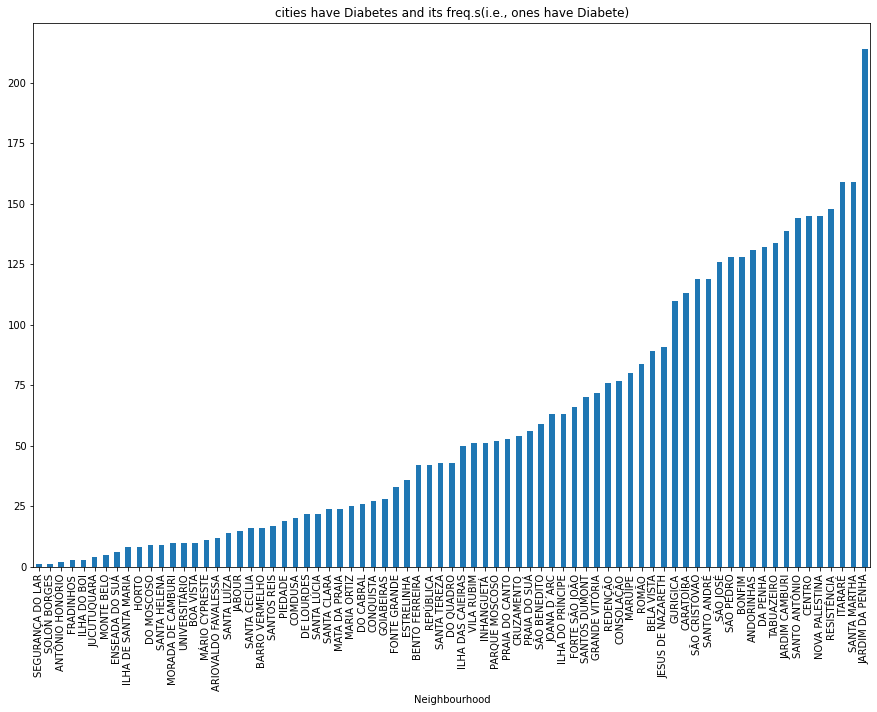

In [ ]:
Neighbourhood_Diabetes = data.groupby('Neighbourhood')['Diabetes'].value_counts()
Neighbourhood_Diabetes[:,1].sort_values().plot(kind = 'bar' , figsize = (15,10) , y = 'counts' , title = 'cities have Diabetes and its freq.s(i.e., ones have Diabete)')
print(Neighbourhood_Diabetes[:,1].sort_values())
'''
max_c = 0
m = 0
min_c = 0
mi = 100000
for c in data['Neighbourhood'].unique():
  try:
    x = Neighbourhood_Diabetes[c][1]
  except KeyError:
    pass
  if m < x:
    m = x
    max_c = c
  
  if mi > x:
    mi = x
    min_c = c
  

print('city has max number of Diabetes',m,' ',max_c)
print('city has min number of Diabetes',mi,' ',min_c)
print(Neighbourhood_Diabetes['SOLON BORGES'][1],' ',Neighbourhood_Diabetes['JARDIM DA PENHA'][1])
'''

So,  JARDIM DA PENHA city has most number
diabetics equals 214 ones and SEGURANC¸ A DO LAR and SOLON BORGES
have least number diabetics equals 1

Neighbourhood
PARQUE INDUSTRIAL                 1
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     5
AEROPORTO                         7
ILHA DO BOI                      19
                               ... 
ITARARÉ                        1911
RESISTÊNCIA                    2115
JARDIM DA PENHA                2175
MARIA ORTIZ                    3191
JARDIM CAMBURI                 3977
Name: Diabetes, Length: 81, dtype: int64


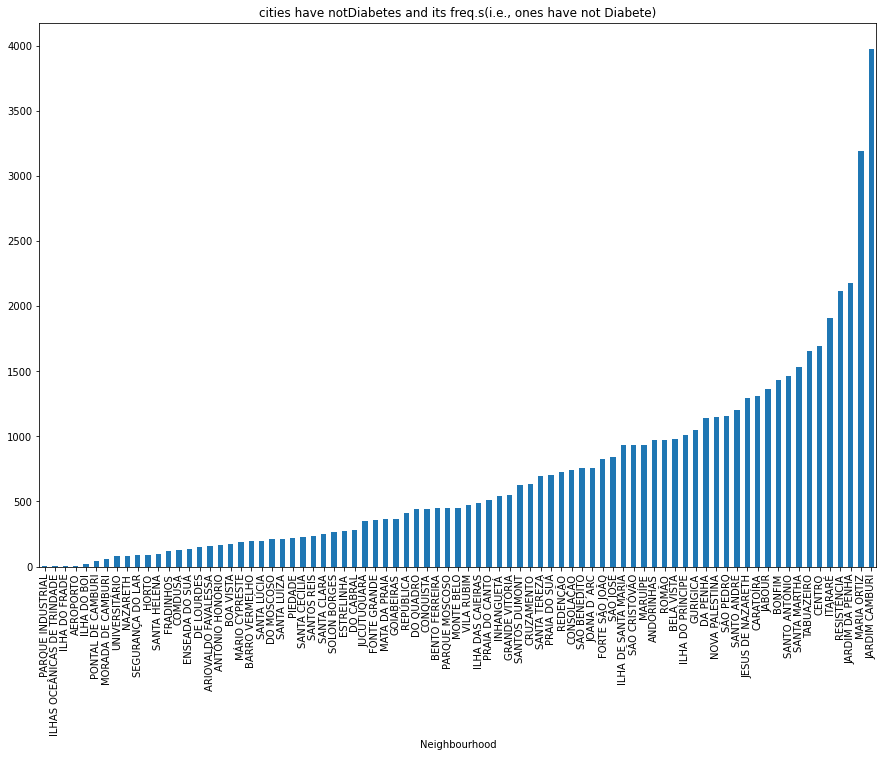

In [ ]:
print(Neighbourhood_Diabetes[:,0].sort_values())
Neighbourhood_Diabetes[:,0].sort_values().plot(kind = 'bar', figsize= (15,10), title = 'cities have notDiabetes and its freq.s(i.e., ones have not Diabete)')

So,  JARDIM CAMBURI city has the most
number non diabetics equals 3977. PARQUE INDUSTRIAL the least number
non diabetics equals 1

Below, joint distribution counts between Neighbourhood and Diabetes

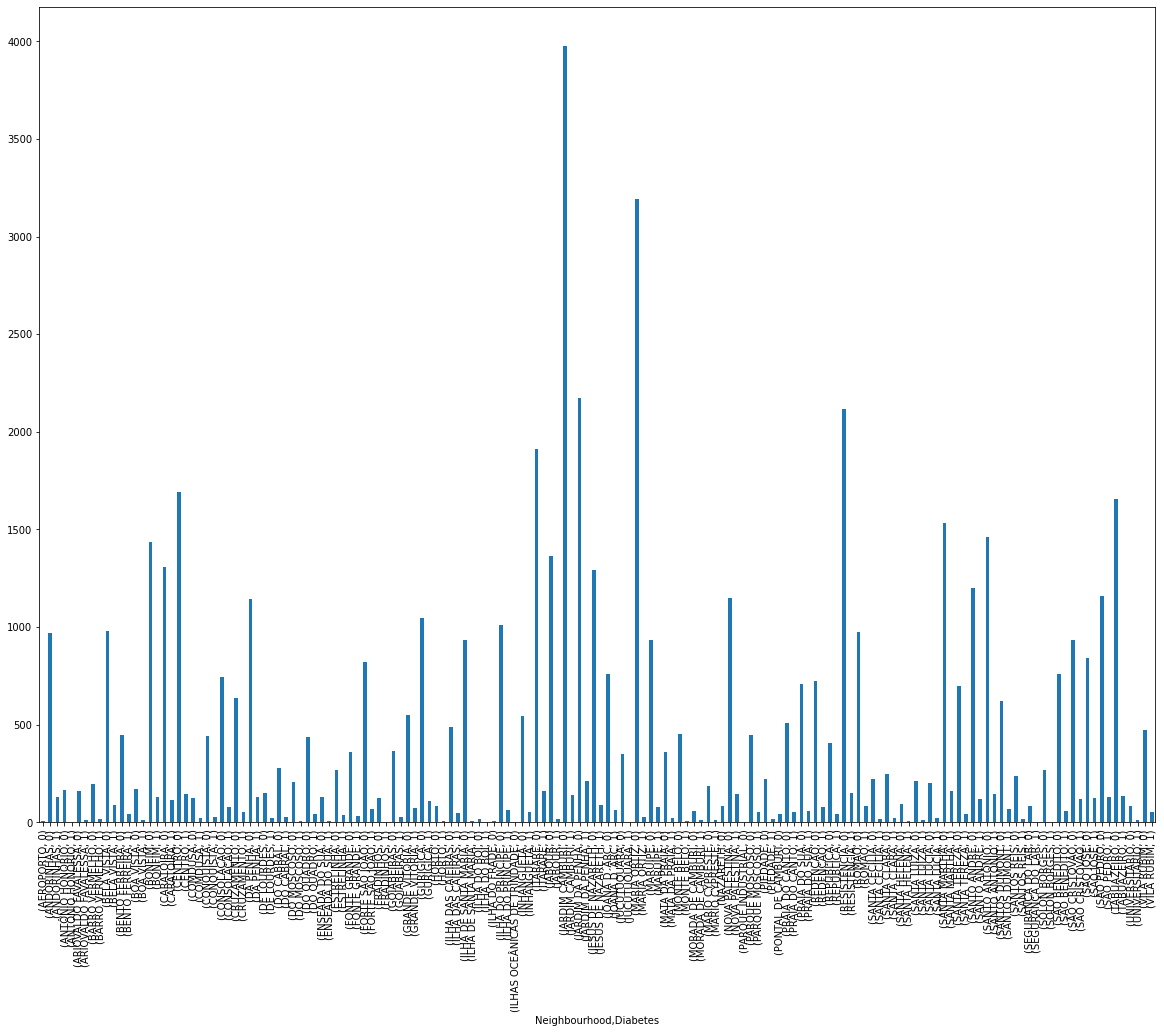

In [ ]:
Neighbourhood_Diabetes.plot(kind = 'bar',figsize = (20,15))

What are important features if no-show is target?

In [ ]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np
#cols = np.array(list(data.columns))
cols = np.array(['Gender', 'Age','Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'])
X = data[cols].to_numpy()
y = data['No-show'].to_numpy()


In [ ]:
var = [0,0.1,0.2,.3,.5,.6,.8,1]
for v in var:
  selector = VarianceThreshold(threshold = v)#Removing features with low variance, any way Age is part of new features
  new_X = selector.fit_transform(X)
  #print(new_X)
  Mask = np.array(selector.get_support())
  print(cols[Mask])

['Gender' 'Age' 'Scholarship' 'Hipertension' 'Diabetes' 'Alcoholism'
 'Handcap' 'SMS_received']
['Gender' 'Age' 'Hipertension' 'SMS_received']
['Gender' 'Age' 'SMS_received']
['Age']
['Age']
['Age']
['Age']
['Age']


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
k = [7,5,4,3,2,1]
for i in k:
  selector = SelectKBest(chi2, k=i)
  new_X = selector.fit_transform(X , y)
  #print(new_X)
  Mask = np.array(selector.get_support())
  print(cols[Mask])

['Age' 'Scholarship' 'Hipertension' 'Diabetes' 'Alcoholism' 'Handcap'
 'SMS_received']
['Age' 'Scholarship' 'Hipertension' 'Diabetes' 'SMS_received']
['Age' 'Scholarship' 'Hipertension' 'SMS_received']
['Age' 'Hipertension' 'SMS_received']
['Age' 'SMS_received']
['Age']


In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
k = [50,40,30,10,5]
for i in k:
  selector = SelectPercentile(chi2, percentile=i)
  new_X = selector.fit_transform(X , y)
  #print(new_X)
  Mask = np.array(selector.get_support())
  print(cols[Mask])

['Age' 'Scholarship' 'Hipertension' 'SMS_received']
['Age' 'Hipertension' 'SMS_received']
['Age' 'Hipertension' 'SMS_received']
['Age']
['Age']


So, Age is the most important feature.

**Conclusion**

Age is the most important feature. JARDIM DA PENHA city has most number
diabetics equals 214 ones and SEGURANC¸ A DO LAR and SOLON BORGES
have least number diabetics equals 1. JARDIM CAMBURI city has the most
number non diabetics equals 3977. PARQUE INDUSTRIAL the least number
non diabetics equals 1. The number of ones have diabetes and hasn’t scholarship greater than ones have diabetes and scholarship. Females have diabetes
more then males.Also, number of females greater than males. Corr. between
features is low. The most frequent age is 1 year ago. start AppointmentDay, last
AppointmentDay 2016-04-29 2016-06-08 and its Period 40 days. start ScheduledDay , last ScheduledDay 2015-12-07 2016-06-08 and its Period 184 days.
The most of people show up. Hypertension is influencer disease and its P is 0.2.


**Limitations**

Surely this analysis isnot complete because the dataset has many random variables(i.e., features) and many 2D comparisons. However, data is imbalanced for prediction models. Maybe data have some noise(i.e., outliers) after data cleaning.